
# The Battle of Neighborhoods

## 1. Introduction

The main objective of this project is to help people find places with better facilities around their neighbourhood. This analysis will help people to make efficient decision in finding a place in the neighborhoods of Mecklenburg County.

Many people are migrating to many different states of USA and need a lot of research for sound housing prices and reputed schools for their children. This project is for those people who are looking for better neighborhoods. For ease of accessing to Cafe, School, Supermarket, medical shops, grocery shops, mall, theatre, hospital, like-minded people, etc.

This project intends to create an analysis of features for people who are migrating to Mecklenburg County, NC in search of the best neighborhood as a relative analysis between neighborhoods. The highlights include median housing price and better school according to ratings, crime rates of that particular area, road connectivity, weather conditions, good management for an emergency, water resources both fresh and wastewater and excrement conveyed in sewers and recreational facilities.

It will help people to get the awareness of the area and neighborhood before moving to a new city, state, country or place for their work or to start a new fresh life.

## 2. Problem Statement
The major goal of this project is to recommend a better neighborhood in a new city for the person who is moving there. Connectivity to the airport, grocery store, shopping malls, movie theatres and other daily needs nearby. This will be perfect for like minded people only.

1. To find out the best house ratings, prices and nearby amenities in the neighborhoods.

## 3. Work Flow
Using credentials of Foursquare API features of near-by places of the neighborhoods would be mined. Due to HTTP request restrictions, the number of places per neighborhood parameter would reasonably be set to 100 and the radius parameter would be set to 500.

## 4. Clustering Strategy
To compare the similarities of two cities, we decided to examine neighborhoods, segment them, and group them into clusters to find similar neighborhoods in a big city like New York and Toronto. To be able to do that, we need to cluster data which is a form of unsupervised machine learning: a k-means clustering algorithm

Libraries Which are Used to Develope the Project
1. Pandas: To create and manipulate data frames.
2. Folium: Python visualization library would be used to visualize the neighborhood cluster distribution of using an interactive leaflet map.
3. Scikit Learn: To import k-means clustering.
4. JSON: Library to handle JSON files.
5. XML: To separate data from presentation and XML stores data in plain text format.
6. Geocoder: To retrieve Location Data.
7. Beautiful Soup and Requests: To scrap and library to handle HTTP requests.
8. Matplotlib: To Python Plotting Module.

### Adding required libraries

In [1]:
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!pip install selenium

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
!pip install geopy
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans
import folium # map rendering library


print('Libraries imported.')

Libraries imported.


## 5. Data Description

The dataset for this project consists of information regarding the Mecklenburg County obtained from https://simplemaps.com/data/us-cities. The Foursquare API was be used to collect venues near the neighborhoods for cluster analysis to be performed on the data. The data contains the details of City Name, County Code, County Name, Density, Id, Latitude, Longitude, Source, State Id, State Name, and Timezone.

### Foursquare API Data

We will need data about different venues in different neighborhoods of that specific borough. In order to gain that information we will use "Foursquare" locational information. Foursquare is a location data provider with information about all manner of venues and events within an area of interest. Such information includes venue names, locations, menus and even photos. As such, the foursquare location platform will be used as the sole data source since all the stated required information can be obtained through the API.

After finding the list of neighborhoods, we then connect to the Foursquare API to gather information about venues inside each and every neighborhood. For each neighborhood, we have chosen the radius to be 100 meter

The data retrieved from Foursquare contained information of venues within a specified distance of the longitude and latitude of the postcodes. The information obtained per venue as follows:

1. Neighborhood
2. Neighborhood Latitude
3. Neighborhood Longitude
4. Venue
5. Name of the venue e.g. the name of a store or restaurant
6. Venue Latitude
7. Venue Longitude
8. Venue Category

The data is taken from the above link and coordinates are generated using Tableau.

In [2]:
json_data = 'E:\some_us_cities-coordinates.json'
json_data

df = pd.read_json(json_data, orient='columns')

In [3]:
df.head()
df.shape

(36651, 11)

In [4]:
df.rename(columns={'State Id': 'State', 'County Name':'County', 'County Code':'CountyCode', 'City Name':'Neighborhood'}, inplace=True)
df.head()

,Neighborhood,CountyCode,County,Density,Id,Latitude,Longitude,Source,State,State Name,Timezone
0,Prairie Ridge,53053,Pierce,1349.8,1840037882,47.1443,-122.1408,polygon,WA,Washington,America/Los_Angeles
1,Edison,53057,Skagit,127.4,1840017314,48.5602,-122.4311,polygon,WA,Washington,America/Los_Angeles
2,Packwood,53041,Lewis,213.9,1840025265,46.6085,-121.6702,polygon,WA,Washington,America/Los_Angeles
3,Wautauga Beach,53035,Kitsap,261.7,1840037725,47.5862,-122.5482,point,WA,Washington,America/Los_Angeles
4,Harper,53035,Kitsap,342.1,1840037659,47.5207,-122.5196,point,WA,Washington,America/Los_Angeles


In [5]:
# Selecting the data from NC State Only
NC_data = df[df.State == 'NC']
NC_data.head()

,Neighborhood,CountyCode,County,Density,Id,Latitude,Longitude,Source,State,State Name,Timezone
7096,Bellemont,37001,Alamance,94.9,1840032927,36.0257,-79.4431,point,NC,North Carolina,America/New_York
7097,Roaring Gap,37005,Alleghany,29.6,1840032976,36.4029,-80.9854,point,NC,North Carolina,America/New_York
7098,South Wadesboro,37007,Anson,232.2,1840032888,34.9563,-80.0773,point,NC,North Carolina,America/New_York
7099,Warrensville,37009,Ashe,56.0,1840032993,36.4607,-81.5190,point,NC,North Carolina,America/New_York
7100,Glendale Springs,37009,Ashe,59.1,1840032951,36.3451,-81.3804,point,NC,North Carolina,America/New_York


In [6]:
# Removing unneccesary columns
cols = [0,2,3,5,6,8]
NC_data = NC_data[NC_data.columns[cols]]
NC_data.head().reset_index()

,index,Neighborhood,County,Density,Latitude,Longitude,State
0,7096,Bellemont,Alamance,94.9,36.0257,-79.4431,NC
1,7097,Roaring Gap,Alleghany,29.6,36.4029,-80.9854,NC
2,7098,South Wadesboro,Anson,232.2,34.9563,-80.0773,NC
3,7099,Warrensville,Ashe,56.0,36.4607,-81.5190,NC
4,7100,Glendale Springs,Ashe,59.1,36.3451,-81.3804,NC


In [7]:
NC_data.shape

(872, 6)

### Getting the geographic coordinates of given address

In [8]:
address = '12002 Diploma Dr, Charlotte, NC, 28262'

geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of 1400 Spring Garden Street, Greensboro, NC 27412 is {}, {}.'.format(latitude, longitude))

C:\Users\akhil\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DeprecationWarning: Using Nominatim with the default "geopy/1.22.0" `user_agent` is strongly discouraged, as it violates Nominatim's ToS https://operations.osmfoundation.org/policies/nominatim/ and may possibly cause 403 and 429 HTTP errors. Please specify a custom `user_agent` with `Nominatim(user_agent="my-application")` or by overriding the default `user_agent`: `geopy.geocoders.options.default_user_agent = "my-application"`. In geopy 2.0 this will become an exception.
  This is separate from the ipykernel package so we can avoid doing imports until


The geograpical coordinate of 1400 Spring Garden Street, Greensboro, NC 27412 is 35.30952730612245, -80.7210469387755.


## 6. Visualizing NC state data

In [9]:
map = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
for lat, lng, city, county in zip(NC_data['Latitude'], NC_data['Longitude'], NC_data['Neighborhood'], NC_data['County']):
    label = '{}, {}'.format(county, city)
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='brown',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        ).add_to(map) 
map

### Querying for Mecklenburg county neighborhoods

In [10]:
mecklenburg_data = NC_data[NC_data.County == 'Mecklenburg']
print('The dataframe has', mecklenburg_data.shape, 'rows and columns respectively.')
mecklenburg_data.reset_index()

The dataframe has (10, 6) rows and columns respectively.


,index,Neighborhood,County,Density,Latitude,Longitude,State
0,7182,Paw Creek,Mecklenburg,533.0,35.2749,-80.9384,NC
1,7183,Hickory Grove,Mecklenburg,992.4,35.2288,-80.7206,NC
2,7184,Derita,Mecklenburg,1123.7,35.2938,-80.7976,NC
3,32556,Pineville,Mecklenburg,500.0,35.0864,-80.8915,NC
4,32557,Davidson,Mecklenburg,835.0,35.4861,-80.8272,NC
5,32558,Mint Hill,Mecklenburg,424.0,35.1781,-80.6538,NC
6,32559,Cornelius,Mecklenburg,951.0,35.4733,-80.8833,NC
7,32560,Matthews,Mecklenburg,710.0,35.1196,-80.7101,NC
8,32561,Huntersville,Mecklenburg,530.0,35.4055,-80.8741,NC
9,32562,Charlotte,Mecklenburg,1065.0,35.2080,-80.8308,NC


## 7. Connecting to Foursquare API to get the venue details

In [11]:
CLIENT_ID = 'ZOGHUYFOL1WKPZ5V3JNB2XWXT1BGSMMS3QXRJ2PVWGJZT2LI' # your Foursquare ID
CLIENT_SECRET = 'CXUEEB3ADLXTFRJ0CB1W0L11IRT1JQWESCUFZOXAHLJ002JC' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: ZOGHUYFOL1WKPZ5V3JNB2XWXT1BGSMMS3QXRJ2PVWGJZT2LI
CLIENT_SECRET:CXUEEB3ADLXTFRJ0CB1W0L11IRT1JQWESCUFZOXAHLJ002JC


In [12]:
# Using foursquare API get the venue data within the radius of 700m
radius = 700 
LIMIT = 100
url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
    CLIENT_ID, 
    CLIENT_SECRET, 
    VERSION, 
    latitude, 
   longitude, 
    radius, 
   LIMIT)
results = requests.get(url).json()
print(results)

{'meta': {'code': 200, 'requestId': '5ee6745ccb82360791f92d25'}, 'response': {'suggestedFilters': {'header': 'Tap to show:', 'filters': [{'name': 'Open now', 'key': 'openNow'}, {'name': '$-$$$$', 'key': 'price'}]}, 'headerLocation': 'Charlotte', 'headerFullLocation': 'Charlotte', 'headerLocationGranularity': 'city', 'totalResults': 18, 'suggestedBounds': {'ne': {'lat': 35.315827312422456, 'lng': -80.71334114987032}, 'sw': {'lat': 35.30322729982244, 'lng': -80.72875272768069}}, 'groups': [{'type': 'Recommended Places', 'name': 'recommended', 'items': [{'reasons': {'count': 0, 'items': [{'summary': 'This spot is popular', 'type': 'general', 'reasonName': 'globalInteractionReason'}]}, 'venue': {'id': '4b21aa62f964a520c83f24e3', 'name': 'ABC Store', 'location': {'address': '9630 University City Blvd Ste A', 'lat': 35.30758702722114, 'lng': -80.7206472656032, 'labeledLatLngs': [{'label': 'display', 'lat': 35.30758702722114, 'lng': -80.7206472656032}], 'distance': 219, 'postalCode': '28213',

In [13]:
# Printing all the columns extracted from foursquare API
venues=results['response']['groups'][0]['items']
nearby_venues = json_normalize(venues)
nearby_venues.columns

Index(['reasons.count', 'reasons.items', 'referralId', 'venue.categories',
       'venue.delivery.id', 'venue.delivery.provider.icon.name',
       'venue.delivery.provider.icon.prefix',
       'venue.delivery.provider.icon.sizes', 'venue.delivery.provider.name',
       'venue.delivery.url', 'venue.id', 'venue.location.address',
       'venue.location.cc', 'venue.location.city', 'venue.location.country',
       'venue.location.crossStreet', 'venue.location.distance',
       'venue.location.formattedAddress', 'venue.location.labeledLatLngs',
       'venue.location.lat', 'venue.location.lng', 'venue.location.postalCode',
       'venue.location.state', 'venue.name', 'venue.photos.count',
       'venue.photos.groups', 'venue.venuePage.id'],
      dtype='object')

In [14]:
# filtering required columns of the above list of columns
def get_category_type(row):
    try:
        categories_list = row['categories']
    except:
        categories_list = row['venue.categories']
        
    if len(categories_list) == 0:
        return None
    else:
        return categories_list[0]['name']

In [15]:
filtered_columns = ['venue.name', 'venue.categories', 'venue.location.lat', 'venue.location.lng']
nearby_venues =nearby_venues.loc[:, filtered_columns]
nearby_venues.head()

,venue.name,venue.categories,venue.location.lat,venue.location.lng
0,ABC Store,"[{'id': '4bf58dd8d48988d186941735', 'name': 'L...",35.307587,-80.720647
1,Domino's Pizza,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",35.307241,-80.720769
2,Passage To India,"[{'id': '4bf58dd8d48988d10f941735', 'name': 'I...",35.305568,-80.723578
3,Toppers Pizza,"[{'id': '4bf58dd8d48988d1ca941735', 'name': 'P...",35.305833,-80.723367
4,Jimmy John's,"[{'id': '4bf58dd8d48988d1c5941735', 'name': 'S...",35.309769,-80.715491


In [16]:
# top 5 venues near the given address
nearby_venues['venue.categories'] = nearby_venues.apply(get_category_type, axis=1)

# clean columns
nearby_venues.columns = [col.split(".")[-1] for col in nearby_venues.columns]

nearby_venues.head(5)

,name,categories,lat,lng
0,ABC Store,Liquor Store,35.307587,-80.720647
1,Domino's Pizza,Pizza Place,35.307241,-80.720769
2,Passage To India,Indian Restaurant,35.305568,-80.723578
3,Toppers Pizza,Pizza Place,35.305833,-80.723367
4,Jimmy John's,Sandwich Place,35.309769,-80.715491


In [17]:
a= pd.Series(nearby_venues.categories)
a.value_counts()[:10]

Pizza Place               3
Smoke Shop                2
Convenience Store         2
Liquor Store              1
Sandwich Place            1
Gas Station               1
Japanese Restaurant       1
Miscellaneous Shop        1
Indian Restaurant         1
Thrift / Vintage Store    1
Name: categories, dtype: int64

### Nearby Venues of Mecklenburg County

In [18]:
def getNearbyVenues(names, latitudes, longitudes, radius=700):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # making GET request
        venue_results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in venue_results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [19]:
Mecklenburg_venues = getNearbyVenues(names=mecklenburg_data['Neighborhood'],
                                   latitudes=mecklenburg_data['Latitude'],
                                   longitudes=mecklenburg_data['Longitude']
                                  )

Paw Creek
Hickory Grove
Derita
Pineville
Davidson
Mint Hill
Cornelius
Matthews
Huntersville
Charlotte


In [20]:
print('There are {} Uniques Categories.'.format(len(Mecklenburg_venues['Venue Category'].unique())))
Mecklenburg_venues.groupby('Neighborhood').count().head()

There are 75 Uniques Categories.


,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
Neighborhood,,,,,,
Charlotte,53,53,53,53,53,53
Cornelius,7,7,7,7,7,7
Davidson,2,2,2,2,2,2
Derita,12,12,12,12,12,12
Hickory Grove,2,2,2,2,2,2


In [21]:
# one hot encoding
Mecklenburg_onehot = pd.get_dummies(Mecklenburg_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
Mecklenburg_onehot['Neighborhood'] = Mecklenburg_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [Mecklenburg_onehot.columns[-1]] + list(Mecklenburg_onehot.columns[:-1])
Mecklenburg_onehot = Mecklenburg_onehot[fixed_columns]
Mecklenburg_grouped = Mecklenburg_onehot.groupby('Neighborhood').mean().reset_index()
Mecklenburg_onehot.head(5)

,Neighborhood,American Restaurant,Athletics & Sports,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beer Bar,Beer Garden,Big Box Store,Breakfast Spot,Bubble Tea Shop,Café,Camera Store,Caribbean Restaurant,Chinese Restaurant,Coffee Shop,Construction & Landscaping,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Dry Cleaner,Electronics Store,Farmers Market,Fast Food Restaurant,Fondue Restaurant,Food Truck,Fried Chicken Joint,Furniture / Home Store,Garden Center,Gas Station,Gift Shop,Golf Course,Gourmet Shop,Grocery Store,Gym,Gym / Fitness Center,Hobby Shop,Home Service,Ice Cream Shop,Indian Restaurant,Italian Restaurant,Martial Arts Dojo,Men's Store,Mexican Restaurant,Mobile Phone Shop,Motorcycle Shop,Optical Shop,Other Repair Shop,Park,Pet Store,Pharmacy,Pizza Place,Record Shop,Restaurant,Salon / Barbershop,Sandwich Place,Scenic Lookout,Shipping Store,Shoe Store,Smoke Shop,Sporting Goods Shop,Sports Bar,Supermarket,Supplement Shop,Sushi Restaurant,Tea Room,Video Store,Women's Store
0,Paw Creek,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,Paw Creek,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,Paw Creek,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,Paw Creek,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,Hickory Grove,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [22]:
num_top_venues = 5
for hood in Mecklenburg_grouped['Neighborhood']:
    print("---- "+hood+" ----")
    temp =Mecklenburg_grouped[Mecklenburg_grouped['Neighborhood'] == hood].T.reset_index()
    temp.columns = ['venue','freq']
    temp = temp.iloc[1:]
    temp['freq'] = temp['freq'].astype(float)
    temp = temp.round({'freq': 2})
    print(temp.sort_values('freq', ascending=False).reset_index(drop=True).head(num_top_venues))
    print('\n')

---- Charlotte ----
                 venue  freq
0          Pizza Place  0.09
1  American Restaurant  0.04
2       Sandwich Place  0.04
3    Convenience Store  0.04
4   Chinese Restaurant  0.04


---- Cornelius ----
                 venue  freq
0  American Restaurant  0.14
1           Sports Bar  0.14
2        Grocery Store  0.14
3           Donut Shop  0.14
4   Mexican Restaurant  0.14


---- Davidson ----
                        venue  freq
0  Construction & Landscaping   0.5
1              Cosmetics Shop   0.5
2                 Men's Store   0.0
3                   Pet Store   0.0
4                        Park   0.0


---- Derita ----
                venue  freq
0            Pharmacy  0.08
1  Chinese Restaurant  0.08
2         Video Store  0.08
3      Discount Store  0.08
4                Bank  0.08


---- Hickory Grove ----
               venue  freq
0  Convenience Store   0.5
1   Basketball Court   0.5
2  Martial Arts Dojo   0.0
3               Park   0.0
4  Other Repair Shop   0.

In [23]:
# returning most common venues near each neighborhood
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]

In [24]:
import numpy as np
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

neighborhoods_venues_sorted = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted['Neighborhood'] = Mecklenburg_grouped['Neighborhood']

for ind in np.arange(Mecklenburg_grouped.shape[0]):
    neighborhoods_venues_sorted.iloc[ind, 1:] = return_most_common_venues(Mecklenburg_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Charlotte,Pizza Place,Chinese Restaurant,Park,Fast Food Restaurant,Sandwich Place,Convenience Store,American Restaurant,Italian Restaurant,Bakery,Furniture / Home Store
1,Cornelius,American Restaurant,Athletics & Sports,Pet Store,Mexican Restaurant,Sports Bar,Grocery Store,Donut Shop,Diner,Cosmetics Shop,Deli / Bodega
2,Davidson,Construction & Landscaping,Cosmetics Shop,Women's Store,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Dry Cleaner
3,Derita,Sandwich Place,Home Service,Chinese Restaurant,Video Store,Supermarket,Bank,Fried Chicken Joint,Donut Shop,Scenic Lookout,Pharmacy
4,Hickory Grove,Convenience Store,Basketball Court,Dry Cleaner,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop


## 8. Clustering the Neighborhoods in 3 clusters

In [25]:
# Using K-Means to cluster neighborhood into 3 clusters
Mecklenburg_grouped_clustering = Mecklenburg_grouped.drop('Neighborhood', 1)
kmeans = KMeans(n_clusters=3, random_state=0).fit(Mecklenburg_grouped_clustering)
kmeans.labels_

array([0, 0, 1, 0, 2, 0, 0, 0, 0, 0])

In [26]:
# adding cluster labels into mecklenburg data
neighborhoods_venues_sorted.insert(0, 'Cluster Labels', kmeans.labels_)

Mecklenburg_merged =mecklenburg_data.iloc[:16,:]

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
Mecklenburg_merged = Mecklenburg_merged.join(neighborhoods_venues_sorted.set_index('Neighborhood'), on='Neighborhood')

Mecklenburg_merged.head()# check the last columns!

,Neighborhood,County,Density,Latitude,Longitude,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7182,Paw Creek,Mecklenburg,533.0,35.2749,-80.9384,NC,0,Discount Store,Convenience Store,Pizza Place,Restaurant,Coffee Shop,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner
7183,Hickory Grove,Mecklenburg,992.4,35.2288,-80.7206,NC,2,Convenience Store,Basketball Court,Dry Cleaner,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop
7184,Derita,Mecklenburg,1123.7,35.2938,-80.7976,NC,0,Sandwich Place,Home Service,Chinese Restaurant,Video Store,Supermarket,Bank,Fried Chicken Joint,Donut Shop,Scenic Lookout,Pharmacy
32556,Pineville,Mecklenburg,500.0,35.0864,-80.8915,NC,0,Golf Course,Indian Restaurant,Motorcycle Shop,Deli / Bodega,Electronics Store,Mexican Restaurant,Chinese Restaurant,Coffee Shop,Convenience Store,Grocery Store
32557,Davidson,Mecklenburg,835.0,35.4861,-80.8272,NC,1,Construction & Landscaping,Cosmetics Shop,Women's Store,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Dry Cleaner


In [27]:
kclusters = 3

In [28]:
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
colors_array = cm.rainbow(np.linspace(0, 1, kclusters))
rainbow = [colors.rgb2hex(i) for i in colors_array]
print(rainbow)
# add markers to the map

markers_colors = []
for lat, lon, nei , cluster in zip(Mecklenburg_merged['Latitude'], 
                                   Mecklenburg_merged['Longitude'], 
                                   Mecklenburg_merged['Neighborhood'], 
                                   Mecklenburg_merged['Cluster Labels']):
    label = folium.Popup(str(nei) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
       
map_clusters

['#8000ff', '#80ffb4', '#ff0000']


In [29]:

df1=Mecklenburg_merged.loc[Mecklenburg_merged['Cluster Labels'] == 0,Mecklenburg_merged.columns[[2] + list(range(5, Mecklenburg_merged.shape[1]))]]
df2=Mecklenburg_merged.loc[Mecklenburg_merged['Cluster Labels'] == 1,Mecklenburg_merged.columns[[2] + list(range(5, Mecklenburg_merged.shape[1]))]]
df3=Mecklenburg_merged.loc[Mecklenburg_merged['Cluster Labels'] == 2,Mecklenburg_merged.columns[[2] + list(range(5, Mecklenburg_merged.shape[1]))]]

### Density of population at each neighborhood

In [30]:
import matplotlib.pyplot as plt
plt.figure(figsize=(10,10))
#mecklenburg_merged.hist(column='Density')
Mecklenburg_merged.plot(kind='bar',x='Neighborhood',y='Density', color=rainbow[cluster])
plt.show()

<Figure size 1000x1000 with 0 Axes>

<Figure size 640x480 with 1 Axes>

### Mecklenburg County most common venues at each cluster

In [31]:
Mecklenburg_merged.loc[Mecklenburg_merged['Cluster Labels'] == 0, Mecklenburg_merged.columns[[1] + list(range(5, Mecklenburg_merged.shape[1]))]]

,County,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7182,Mecklenburg,NC,0,Discount Store,Convenience Store,Pizza Place,Restaurant,Coffee Shop,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner
7184,Mecklenburg,NC,0,Sandwich Place,Home Service,Chinese Restaurant,Video Store,Supermarket,Bank,Fried Chicken Joint,Donut Shop,Scenic Lookout,Pharmacy
32556,Mecklenburg,NC,0,Golf Course,Indian Restaurant,Motorcycle Shop,Deli / Bodega,Electronics Store,Mexican Restaurant,Chinese Restaurant,Coffee Shop,Convenience Store,Grocery Store
32558,Mecklenburg,NC,0,Ice Cream Shop,Sandwich Place,Shipping Store,Dessert Shop,Pharmacy,Pizza Place,Restaurant,Discount Store,Convenience Store,Gym
32559,Mecklenburg,NC,0,American Restaurant,Athletics & Sports,Pet Store,Mexican Restaurant,Sports Bar,Grocery Store,Donut Shop,Diner,Cosmetics Shop,Deli / Bodega
32560,Mecklenburg,NC,0,Furniture / Home Store,American Restaurant,Supplement Shop,Video Store,Coffee Shop,Bakery,Breakfast Spot,Mexican Restaurant,Department Store,Ice Cream Shop
32561,Mecklenburg,NC,0,American Restaurant,Optical Shop,Pizza Place,Restaurant,Convenience Store,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner
32562,Mecklenburg,NC,0,Pizza Place,Chinese Restaurant,Park,Fast Food Restaurant,Sandwich Place,Convenience Store,American Restaurant,Italian Restaurant,Bakery,Furniture / Home Store


In [32]:
Mecklenburg_merged.loc[Mecklenburg_merged['Cluster Labels'] == 1, Mecklenburg_merged.columns[[1] + list(range(5, Mecklenburg_merged.shape[1]))]]

,County,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
32557,Mecklenburg,NC,1,Construction & Landscaping,Cosmetics Shop,Women's Store,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop,Dry Cleaner


In [33]:
Mecklenburg_merged.loc[Mecklenburg_merged['Cluster Labels'] == 2, Mecklenburg_merged.columns[[1] + list(range(5, Mecklenburg_merged.shape[1]))]]

,County,State,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7183,Mecklenburg,NC,2,Convenience Store,Basketball Court,Dry Cleaner,Cosmetics Shop,Deli / Bodega,Department Store,Dessert Shop,Diner,Discount Store,Donut Shop


### Average Housing Price at Each Neighborhood

In [34]:
#https://www.zillow.com/mecklenburg-county-nc/home-values/
Mecklenburg_Avg_HousingPrice=pd.DataFrame({"Neighborhood":mecklenburg_data["Neighborhood"],
                                      "Average_Housing_Price":[210000.0, 208232.0, 171656.0, 170200.0, 325600.0, 244600.0, 270900.0, 258300.0, 270300.0, 183800.0]})

In [35]:
Mecklenburg_Avg_HousingPrice

,Neighborhood,Average_Housing_Price
7182,Paw Creek,210000.0
7183,Hickory Grove,208232.0
7184,Derita,171656.0
32556,Pineville,170200.0
32557,Davidson,325600.0
32558,Mint Hill,244600.0
32559,Cornelius,270900.0
32560,Matthews,258300.0
32561,Huntersville,270300.0
32562,Charlotte,183800.0


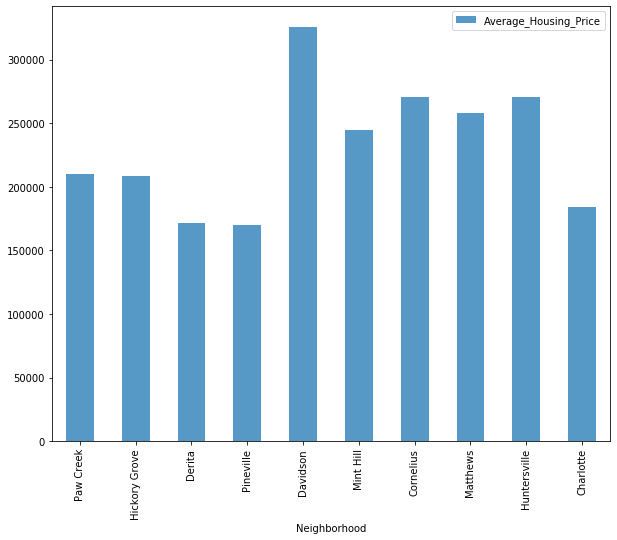

In [36]:
Mecklenburg_Avg_HousingPrice.set_index('Neighborhood',inplace=True,drop=True)
Mecklenburg_Avg_HousingPrice.plot(kind='bar',figsize=(10,8),alpha=0.75)


So from this analysis the user can choose the neighborhood clusters with best facilities availble with reasonable housing prices